In [1]:
'''

Apache Spark is an open-source cluster-computing framework, built around speed, ease of use, and 
streaming analytics whereas Python is a general-purpose, high-level programming language. 
It provides a wide range of libraries and is majorly used for Machine Learning and Real-Time Streaming Analytics.

In other words, it is a Python API for Spark that lets you harness the simplicity of Python and

the power of Apache Spark in order to tame Big Data. 
Pyspark installation

import findspark
findspark.init()

import pyspark # only run after findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

df = spark.sql(\'''select 'spark' as hello \''')
df.show()

#https://changhsinlee.com/install-pyspark-windows-jupyter/

'''

"\n\nApache Spark is an open-source cluster-computing framework, built around speed, ease of use, and \nstreaming analytics whereas Python is a general-purpose, high-level programming language. \nIt provides a wide range of libraries and is majorly used for Machine Learning and Real-Time Streaming Analytics.\n\nIn other words, it is a Python API for Spark that lets you harness the simplicity of Python and\n\nthe power of Apache Spark in order to tame Big Data. \nPyspark installation\n\nimport findspark\nfindspark.init()\n\nimport pyspark # only run after findspark.init()\nfrom pyspark.sql import SparkSession\nspark = SparkSession.builder.getOrCreate()\n\ndf = spark.sql('''select 'spark' as hello ''')\ndf.show()\n\n#https://changhsinlee.com/install-pyspark-windows-jupyter/\n\n"

In [2]:
import findspark
findspark.init()
import os
import pandas as pd
import numpy as np

from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
from pyspark.sql.types import *
import pyspark.sql.functions as F
from pyspark.sql.functions import udf, col

from pyspark.ml.regression import LinearRegression
from pyspark.mllib.evaluation import RegressionMetrics

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator, CrossValidatorModel
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import RegressionEvaluator

import seaborn as sns
import matplotlib.pyplot as plt




In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

from matplotlib import rcParams
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
rcParams['figure.figsize'] = 18,4

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
#setting random seed for notebook reproducabilty
rnd_seed =23
np.random.seed=rnd_seed
np.random.set_state=rnd_seed


In [5]:
#Creating spark session
spark = SparkSession.builder.master("local").appName("xyz").getOrCreate()

In [6]:
sc = spark.sparkContext
sc

<SparkContext master=local appName=xyz>

In [7]:
sqlContext = SQLContext(spark.sparkContext)
sqlContext

In [ ]:
#https://www.kaggle.com/fatmakursun/pyspark-ml-tutorial-for-beginners

In [17]:
HOUSING_DATA='cal_housing.data/cal_housing.data'

In [18]:
# define the schema, corresponding to a line in the csv data file.
schema = StructType([
    StructField("long", FloatType(), nullable=True),
    StructField("lat", FloatType(), nullable=True),
    StructField("medage", FloatType(), nullable=True),
    StructField("totrooms", FloatType(), nullable=True),
    StructField("totbdrms", FloatType(), nullable=True),
    StructField("pop", FloatType(), nullable=True),
    StructField("houshlds", FloatType(), nullable=True),
    StructField("medinc", FloatType(), nullable=True),
    StructField("medhv", FloatType(), nullable=True)]
)

In [19]:
# Load housing data
housing_df = spark.read.csv(path=HOUSING_DATA, schema=schema).cache()

In [20]:
housing_df.take(5)

[Row(long=-122.2300033569336, lat=37.880001068115234, medage=41.0, totrooms=880.0, totbdrms=129.0, pop=322.0, houshlds=126.0, medinc=8.325200080871582, medhv=452600.0),
 Row(long=-122.22000122070312, lat=37.86000061035156, medage=21.0, totrooms=7099.0, totbdrms=1106.0, pop=2401.0, houshlds=1138.0, medinc=8.301400184631348, medhv=358500.0),
 Row(long=-122.23999786376953, lat=37.849998474121094, medage=52.0, totrooms=1467.0, totbdrms=190.0, pop=496.0, houshlds=177.0, medinc=7.257400035858154, medhv=352100.0),
 Row(long=-122.25, lat=37.849998474121094, medage=52.0, totrooms=1274.0, totbdrms=235.0, pop=558.0, houshlds=219.0, medinc=5.643099784851074, medhv=341300.0),
 Row(long=-122.25, lat=37.849998474121094, medage=52.0, totrooms=1627.0, totbdrms=280.0, pop=565.0, houshlds=259.0, medinc=3.8461999893188477, medhv=342200.0)]

In [21]:
housing_df.show(5)

+-------+-----+------+--------+--------+------+--------+------+--------+
|   long|  lat|medage|totrooms|totbdrms|   pop|houshlds|medinc|   medhv|
+-------+-----+------+--------+--------+------+--------+------+--------+
|-122.23|37.88|  41.0|   880.0|   129.0| 322.0|   126.0|8.3252|452600.0|
|-122.22|37.86|  21.0|  7099.0|  1106.0|2401.0|  1138.0|8.3014|358500.0|
|-122.24|37.85|  52.0|  1467.0|   190.0| 496.0|   177.0|7.2574|352100.0|
|-122.25|37.85|  52.0|  1274.0|   235.0| 558.0|   219.0|5.6431|341300.0|
|-122.25|37.85|  52.0|  1627.0|   280.0| 565.0|   259.0|3.8462|342200.0|
+-------+-----+------+--------+--------+------+--------+------+--------+
only showing top 5 rows



In [31]:
result_df= housing_df.groupBy("medage").count().sort('medage')
result_df.show()

+------+-----+
|medage|count|
+------+-----+
|   1.0|    4|
|   2.0|   58|
|   3.0|   62|
|   4.0|  191|
|   5.0|  244|
|   6.0|  160|
|   7.0|  175|
|   8.0|  206|
|   9.0|  205|
|  10.0|  264|
|  11.0|  254|
|  12.0|  238|
|  13.0|  302|
|  14.0|  412|
|  15.0|  512|
|  16.0|  771|
|  17.0|  698|
|  18.0|  570|
|  19.0|  502|
|  20.0|  465|
+------+-----+
only showing top 20 rows



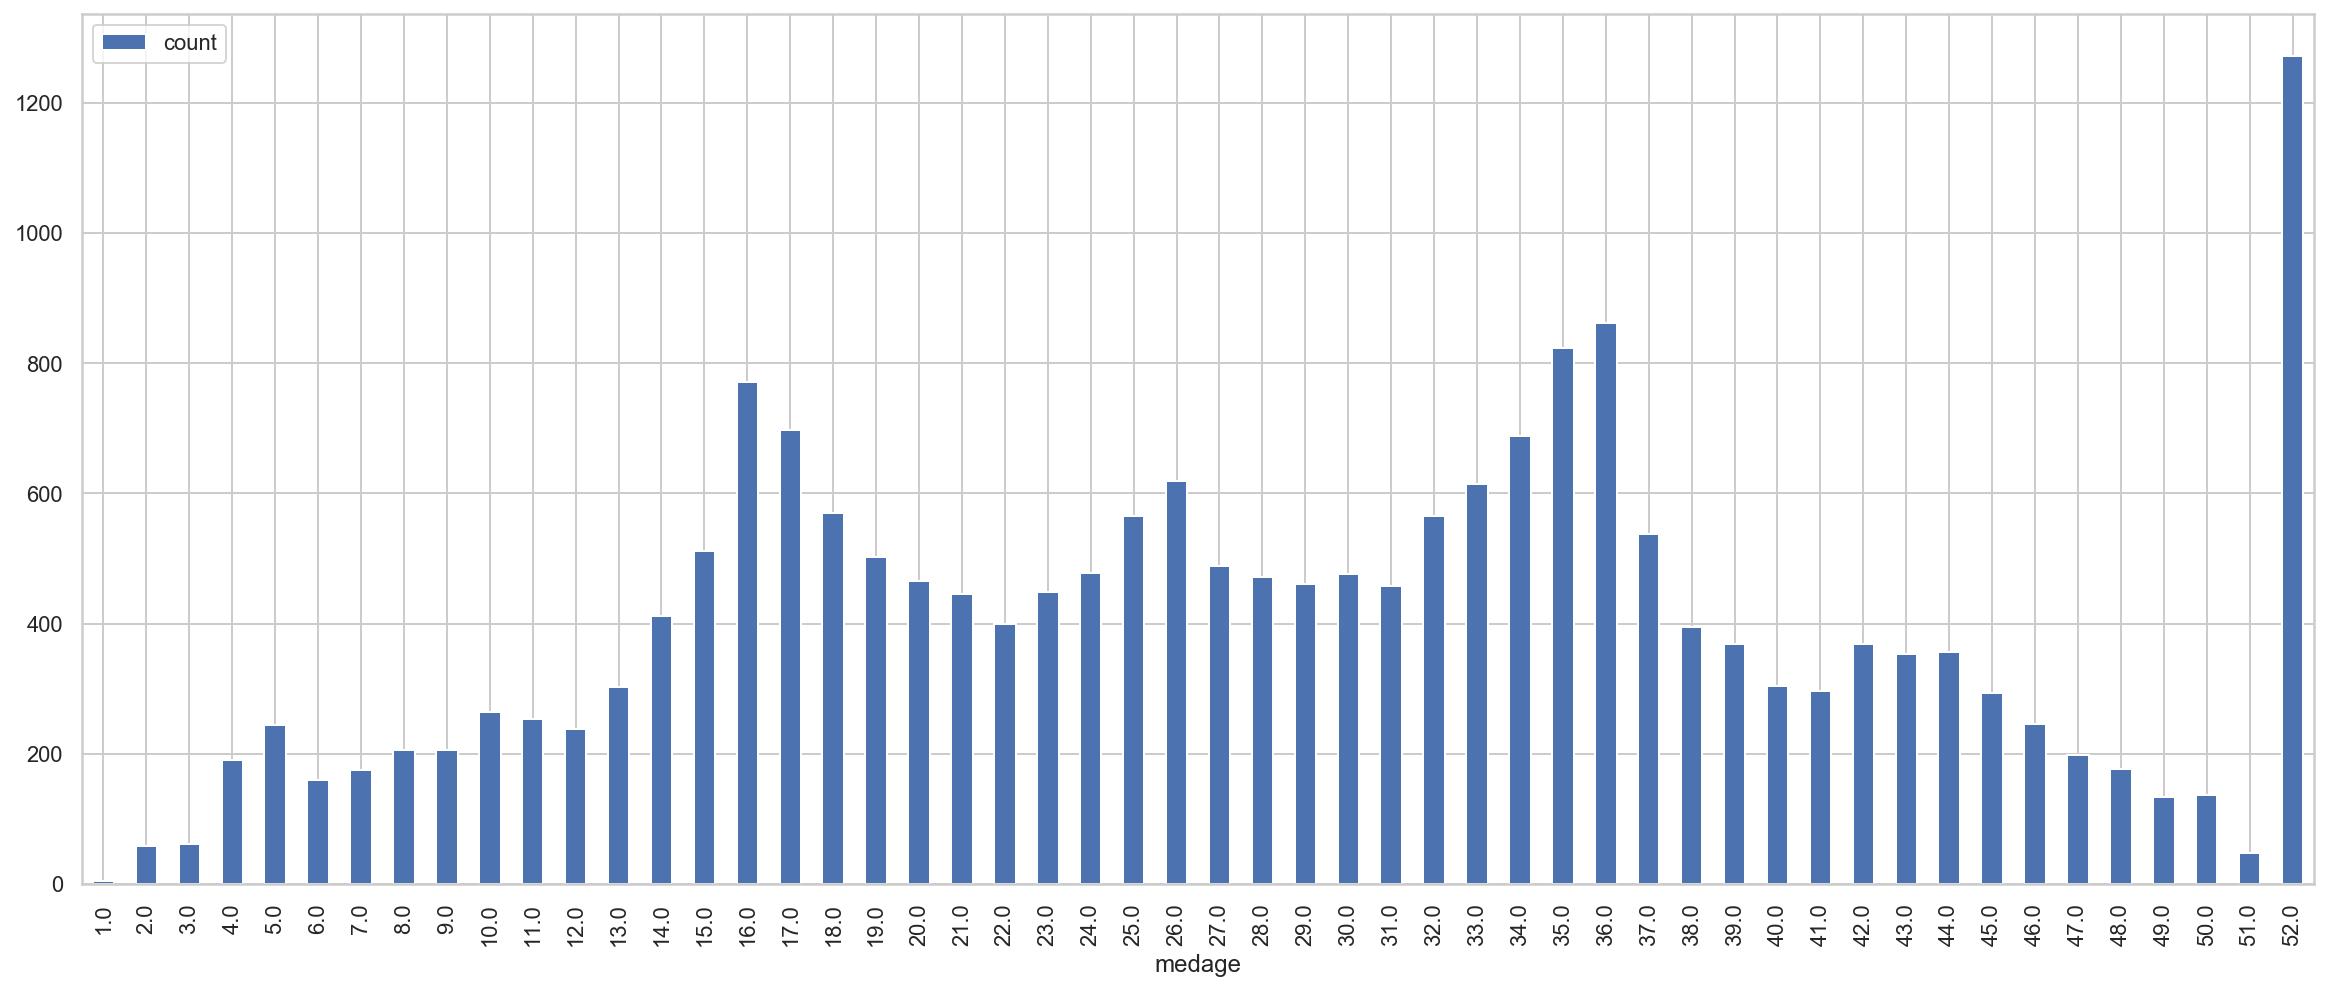

In [35]:
result_df.toPandas().plot.bar(x='medage',figsize=(20,8))